# Data Science and Visualization (RUC F2023)

## Miniproject Report: NLP for review evaluation

## Group Members:
* William Grynderup Klindt, RUC, 2023, wgk@ruc.dk
* Luchas Schmidt, RUC, 2023, luchas@ruc.dk
* Jacob Peter Diesel Nielsen, RUC, 2023, jpn@ruc.dk

## Abstract

This project aims to classify the sentiment of reviews using an existing dataset of product reviews from Amazon. We used the dataset to train two supervised models, namely Support Vector Machine and Naive Bayes. Through various data visualization techniques, we investigated and analyzed which model performed better with our dataset and discussed the pros and cons of our results and approaches. We conclude that the Support vector Machine algorithm is generally better due to its flexibility and that we are content with our models accuracy of approximately 70%.

## 0. Setup and Data

Import the modules needed for the project.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

import nltk ## If the project can't run, you might have to install NLTK. Please follow the instructions here: https://www.nltk.org/install.html 
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet

from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english')) 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/luchasschmidt/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/luchasschmidt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Data description:
This dataset contains approximately 568.000 online Amazon reviews for different amazon products. We have minimized the dataset to approximately 10.000 reviews because we seek to prevent computational and runtime issues.
Here is the link for the dataset: https://www.kaggle.com/datasets/jillanisofttech/amazon-product-reviews

## 1. Loading the Data

Our dataset consists of 10.114 rows and 10 columns.

In [2]:
cwd = os.getcwd()
path_small = os.path.join(cwd, 'Reviews_small.csv')

data = pd.read_csv(path_small)
data.shape

(10114, 10)

Below is a sample of the full dataset which consists of rows that display each review in the dataset and each column displays the following:
- ID
- The product ID
- The ID of the author who wrote the review
- The author's username
- Numerator for helpfulness of review
- Denominator for helpfulness of review
- Product rating
- Review time
- A title of the review
- A descriptive text

In [3]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
10109,10110,B003EML8PM,A11LIEOD0VKUDQ,H. Yeldell,0,0,3,1333670400,Very Good Taste but TOO MUCH SALT,I did not find the smell to be anything but in...
10110,10111,B003EML8PM,A2KZNUJKINCV33,Lynn P Smith,0,0,5,1333584000,Totally wonderful if not overcooked,"Unlike microwave popcorn, you cannot hear the ..."
10111,10112,B003EML8PM,AWG67630UAFHL,T. Siu,0,0,2,1332115200,Tasted good the first few bags...,But the taste got sickening quite fast. It als...
10112,10113,B003EML8PM,A3432KLMRWMLQE,dholco,0,0,5,1331942400,Snacks,I like spicy snacks and this product fills the...


## 2. Data Preprocessing

Since we downloaded the dataset from Kaggle, they ensured that we received a dataset with zero missing values. 
Next, we have decided to drop some of the columns that we found irrelevant for the project.

These are the columns we removed:

In [4]:
data = data.drop(labels=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], axis=1)

As displayed below, the only columns that we found relevant was the "Score" and "Text" column.

In [5]:
data

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
10109,3,I did not find the smell to be anything but in...
10110,5,"Unlike microwave popcorn, you cannot hear the ..."
10111,2,But the taste got sickening quite fast. It als...
10112,5,I like spicy snacks and this product fills the...


To classify reviews as positive, neutral, or negative, we have created a function that evaluates the score of each review. If the review has a score of 3, we consider it to be neutral. If the score is below 3, such as 1 or 2, we consider it to be a negative review. If the score is greater than 3, we consider it to be a positive review.

Below the function, we use a lambda expression to apply the function to each row.

In [6]:
def classify_sentiment(rating):
    if rating == 3:
        return 1
    elif rating in [1, 2]:
        return 0
    else:
        return 2

data['label'] = data['Score'].apply(lambda x: classify_sentiment(x))

We then print the name of each column in our dataset to verify that the functions worked as intended.

In [7]:
data.columns

Index(['Score', 'Text', 'label'], dtype='object')

The dataset now consists of reviews with labels to define the positive, negative, or neutral sentiment of each review. 

In [8]:
data

,Score,Text,label
0,5,I have bought several of the Vitality canned d...,2
1,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,4,This is a confection that has been around a fe...,2
3,2,If you are looking for the secret ingredient i...,0
4,5,Great taffy at a great price. There was a wid...,2
...,...,...,...
10109,3,I did not find the smell to be anything but in...,1
10110,5,"Unlike microwave popcorn, you cannot hear the ...",2
10111,2,But the taste got sickening quite fast. It als...,0
10112,5,I like spicy snacks and this product fills the...,2


To ensure that each row contains a value for each column, we use the info() method from Pandas. We also verify that the "label" column only consists of integer values.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Score   10114 non-null  int64 
 1   Text    10114 non-null  object
 2   label   10114 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 237.2+ KB


### Text cleaning
We seek to clean the text in our dataset to optimize the training model. We found that our text data contains various noise and unwanted characters, such as punctuation, stop words, and special characters, which could potentially affect the quality of the classification process.

We created two functions that are used for lemmatization of each word, meaning that each word should be changed to its root form. The first function, pos_tagger, defines which word class (POS) a given word belongs to. The function takes an NLTK tag as a parameter and returns a Wordnet POS tag. For example, if the input tag is a Noun, it will return a Wordnet Noun tag. If the input tag doesn't match any of the criteria, the function returns None.

Next, we define the function lemmatize_sentence, which is used for lemmatizing sentences. First, we tokenize the sentence with the word_tokenize function from the NLTK library, and secondly, we assign a POS tag to each word with the pos_tag function from the NLTK library. Each POS tag is then converted to a Wordnet POS tag with the beforementioned pos_tagger function. The tokenized words (with their accordingly POS tags) are then stored in a list of tuples.

Lastly, we iterate over the beforementioned list and perform lemmatization of each word with the use of the WordNetLemmatizer and its associated POS tag. If the tag is None (meaning it couldn't assign a tag), the word will be added without lemmatization. If the word got a tag, the word is lemmatized. For both cases, we also make sure that the word is not a stopword. If it is the case, then the word will not be added.

[Reference: Lemmatizer](https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/)

In [10]:
# Define the POS tagger function with modifications for handling unavailable tags
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None  # Use noun as default tag if tag is unavailable''

# Define the function to lemmatize each word in a sentence with its POS tag
def lemmatize_sentence(sentence):
    # Tokenize the sentence and find the POS tag for each token
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))

    # Use our own pos_tagger function to make things simpler to understand
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

    # Lemmatize each word with its POS tag, ignoring stopwords
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None and word.lower() not in stopword:
            # If there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            # Use the tag to lemmatize the token, ignoring stopwords
            if word.lower() not in stopword:
                lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))

    # Join the lemmatized words into a sentence
    return " ".join(lemmatized_sentence)

**Removes any characters that isn't included in the english alphabet.**

In [11]:
data["Text"] = data['Text'].str.replace('[^a-zA-Z]',' ', regex=True)

We create a new column called "lemma_text" that removes all stop words and lemmatizes each word, meaning that each word should be changed to its root form. For instance, the word "running" should be changed to "run". This is done by calling lemmatize_sencence to the column "Text". 

In [12]:
data['lemma_text'] = data.Text.apply(lemmatize_sentence)

Below, we showcase the dataset before and after lemmatization.

In [13]:
data

,Score,Text,label,lemma_text
0,5,I have bought several of the Vitality canned d...,2,buy several Vitality can dog food product find...
1,1,Product arrived labeled as Jumbo Salted Peanut...,0,Product arrive label Jumbo Salted Peanuts pean...
2,4,This is a confection that has been around a fe...,2,confection around century light pillowy citrus...
3,2,If you are looking for the secret ingredient i...,0,look secret ingredient Robitussin believe find...
4,5,Great taffy at a great price There was a wid...,2,Great taffy great price wide assortment yummy ...
...,...,...,...,...
10109,3,I did not find the smell to be anything but in...,1,find smell anything invite Warm pork rind conc...
10110,5,Unlike microwave popcorn you cannot hear the ...,2,Unlike microwave popcorn hear pork skin cook t...
10111,2,But the taste got sickening quite fast It als...,0,taste get sicken quite fast also make really w...
10112,5,I like spicy snacks and this product fills the...,2,like spicy snack product fill bill nicely buy ...


## 3. Exploratory Data Analysis

In this chapter we aim to present informative visualizations of our dataset that highlight relevant aspects of the data. We will then analyze and interpret these visualizations to gain further insights into the data.

### Histogram showcasing the distribution of the original "Score" column

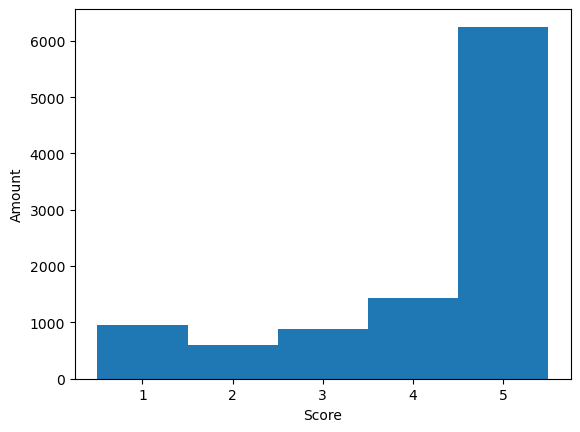

In [14]:
plt.hist(data.Score, align='mid', bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
plt.xticks([1, 2, 3, 4, 5])#, ['Negative', 'Neutral', 'Positive', 'Positive', 'Positive'])
#plt.xlim([0.5, 5.5])
plt.xlabel('Score')
plt.ylabel('Amount')
plt.show()

### Piechart showcasing the distribution of the original "Score" column

<AxesSubplot:ylabel='Score'>

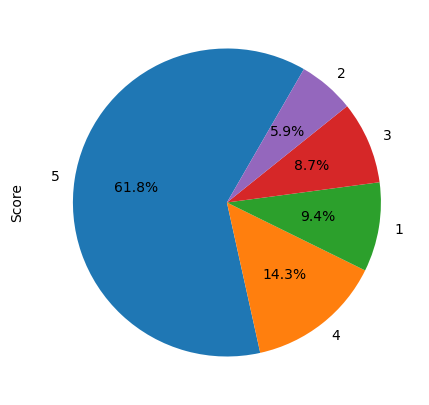

In [15]:
plt.figure(figsize=(5,5))
data['Score'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)

### Histogram showcasing the distribtuion of the "label" column

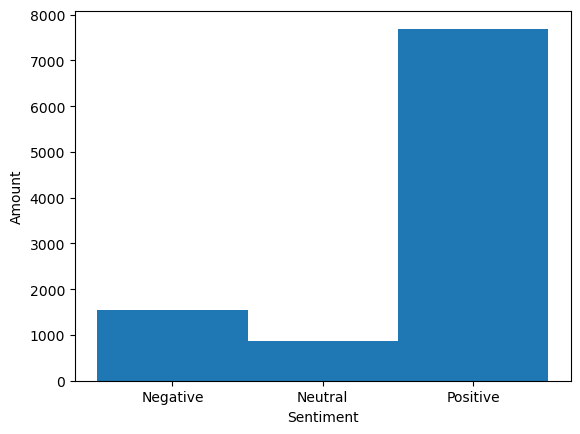

In [16]:
plt.hist(data.label, align='mid', bins=[-0.5, 0.5, 1.5, 2.5])
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
#plt.xlim([-0.5, 2.5])
plt.xlabel('Sentiment')
plt.ylabel('Amount')
plt.show()

### Piechart showcasing the distribution of the "label" column

<AxesSubplot:ylabel='label'>

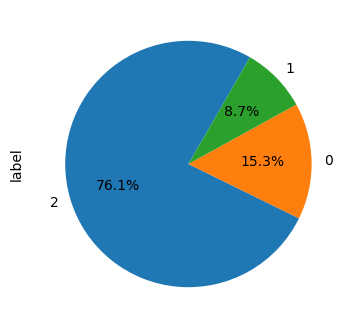

In [17]:
plt.figure(figsize=(4,4))
data['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)

As displayed above, the majority of the labels are valued as positive, and thereby very unbalanced. The different visualizations highlights that our model might be prone to overfitting when trained on this dataset.  

The majority of the positive class can bias the model towards certain patterns or phrases, potentially leading to poor generalization performance on the other two classes. The model may be likely to predict the majority class, even when the input text is from a different class.

To ensure that we train our model properly, without any potential chances of overfitting or general poor performance, we want to balance out our dataset. 

We decided to fix this issue by splitting the score equally among the 5 ratings. Because of computational limits and runtime issues, we have chosen to use 2000 reviews from each rating. This made us use the data from the original dataset containing 568.000 ratings.

In [18]:
path_large = os.path.join(cwd, 'Reviews.csv')
data = pd.read_csv(path_large)

In [19]:
amount = 2000

grouped = data.groupby('Score')

data = pd.DataFrame(columns=['Text', 'Score'])

for label, group in grouped:
    selected_group = group.head(amount)
    data = pd.concat([data, selected_group])

First, we applied all of the previous mentioned methods for text cleaning on the large dataset. We will demonstrate how we accomplished this, but due to the dataset's size, the runtime was quite lengthy. Therefore, we only performed the process once and saved the result as a new dataset, which we named "updated_dataframe.csv".

In [20]:
data = data.drop(labels=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], axis=1)
data['label'] = data['Score'].apply(lambda x: classify_sentiment(x))
data["Text"] = data['Text'].str.replace('[^a-zA-Z]',' ', regex=True)
data['lemma_text'] = data.Text.apply(lemmatize_sentence)


In [21]:
data.to_csv('updated_dataframe.csv', index=False)

In [22]:
path_updated = os.path.join(cwd, 'updated_dataframe.csv')
data = pd.read_csv(path_updated)

In [23]:
data

,Text,Score,label,lemma_text
0,Product arrived labeled as Jumbo Salted Peanut...,1,0,Product arrive label Jumbo Salted Peanuts pean...
1,My cats have been happily eating Felidae Plati...,1,0,cat happily eat Felidae Platinum two year get ...
2,The candy is just red No flavor Just plan...,1,0,candy red flavor plan chewy would never buy
3,This oatmeal is not good Its mushy soft I d...,1,0,oatmeal good mushy soft like Quaker Oats way go
4,Arrived in days and were so stale i could no...,1,0,Arrived day stale could eat bag
...,...,...,...,...
9995,This was my first purchase of this water It ...,5,2,first purchase water taste great bottle thick ...
9996,Water tastes good I typically prefer only pur...,5,2,Water taste good typically prefer purified wat...
9997,Always glad to see this water delivered to our...,5,2,Always glad see water deliver doorstep drop sp...
9998,This water is really good It is reasonab...,5,2,water really good reasonably price mountain sp...


To solve the mentioned issue regarding overfitting we want to balance our dataset. We did that by updating the dataframe so it contains 2000 reviews from each class. The histogram below visualize the new and balanced dataset.

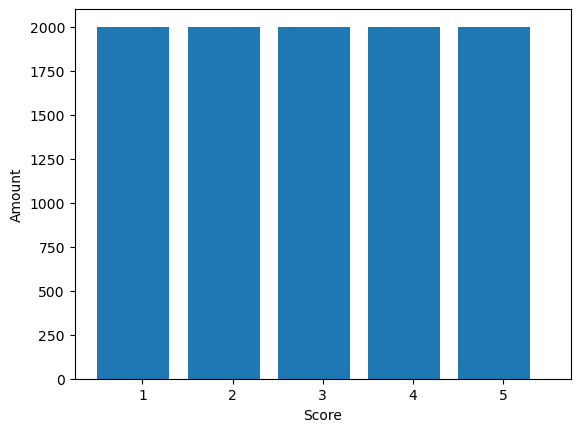

In [24]:
plt.hist(data.Score, align='mid', bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], width=0.8)
plt.xticks([1, 2, 3, 4, 5])#, ['Negative', 'Neutral', 'Positive', 'Positive', 'Positive'])
plt.xlabel('Score')
plt.ylabel('Amount')
plt.show()

## 4. Data Modelling

In this section of our report we aim to present our approach to data modelling. We first present how to select features for training and validate our model. Lastly, we discuss our findings and evaluate the results.

**We select the features we use in our model.**

In [25]:
X = np.array(data["lemma_text"]) ## input data, object (string)
y = np.array(data["label"]) ## label, int64 

Instatiating the two machine learning algorithms Naive Bayes and Support Vector Machines (SVM) for classification tasks.
We are currently using both of these machine learning algorithms in our research for our Bachelor project, which lead us to also use the algorithms in this project. We are using Naive Bayes because of its simplicity, fast training time, and computational efficiency. The SVM algorithm is more powerful and gives us the ability to tweak our model in a more customiziable manner. However, we are using the same methods for training both algorithms and SVM should in theory be slower, but more accurate.

[Reference: Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
<br>
[Reference: Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [26]:
nb = MultinomialNB() # Instantierer Naives Bayes
svm = SVC(kernel='linear') # Instantierer SVM, og sætter dens kernal til linear

**Here we split the data into training and test sets. We decide to use 20% of the data for testing.**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

Here we make use of count vectorizor since we are working with datasets which concists of words, we transform the words into numeric values. We have chosen an ngram range of 1,2, which means we represent word in the sentence as a singe or combination of two words. For instance the sentence "I didn't like this shampoo" is first changed by the ngram range to "I, didn't, like, this, shampoo". Secondly, the sentence is also stored as "I didn't, I like, I this, I shampoo, didn't like, didn't this..." etc. This continious for every combination of every two words.

[Reference: Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [28]:
vectCount = CountVectorizer(ngram_range=(1,2))

Training and testing of the before mentioned algorithms. Initially we create a list called models, storing the names of the algorithms we want to modelize.
We then create a function called data_modelling, with two parameters. The first is models, which is the list of algorithms that we want to modelize. The second is vect, and specifics the method that should be used to represent words as numerical values. In our case we only use CountVectorizer as an argument, but other methods for representing the words could be used.

Inside the function we iterate over a for loop according to the length of the models list. For each iteration, meaning for each algorithm, we transform the text to numerical values for both the training and test. We then train the model with the text represented as numerical values and their according label.
After the first model is trained, the accuracy score gets appended to a list, and the next iteration starts. We finally append all the accuracy scores for both models, and return the list as a DataFrame. This gives a DataFrame showcasing the accuracy for the respective models.

In [29]:
models=[nb, svm]

def data_modelling(models,vect):
    result_table=[]
    for i in range(len(models)):
        X_train_vect = vect.fit_transform(X_train)
        X_test_vect = vect.transform(X_test)
        model = models[i]
        model.fit(X_train_vect, y_train)
        y_pred_class = model.predict(X_test_vect)
        
        data={'Accuracy score':metrics.accuracy_score(y_test, y_pred_class)}
        
        result_table.append(data)  
        
    df = pd.DataFrame(result_table, index =['Naive Bayes', 'Support Vector Machine'])
    return df

In [30]:
data_modelling(models, vectCount)

,Accuracy score
Naive Bayes,0.706
Support Vector Machine,0.694


### Performance Evaluation

In [31]:
amount = 200

small_df = pd.DataFrame(columns=['Text', 'Score'])

for label, group in grouped:
    selected_group = group.head(amount)
    small_df = pd.concat([small_df, selected_group])
    
small_df['label'] = small_df['Score'].apply(lambda x: classify_sentiment(x))
small_df['lemma_text'] = small_df.Text.apply(lemmatize_sentence)

X = np.array(small_df["lemma_text"]) ## input data, object (string)
y = np.array(small_df["label"]) ## label, int64 
nb = MultinomialNB() # Instantierer Naives Bayes
svm = SVC(kernel='linear')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

def data_modelling_2(models,vect):
    result_table=[]
    for i in range(len(models)):
        X_train_vect = vect.fit_transform(X_train)
        X_test_vect = vect.transform(X_test)
        model = models[i]
        model.fit(X_train_vect, y_train)
        y_pred_class = model.predict(X_test_vect)
        
        data={'Accuracy score':metrics.accuracy_score(y_test, y_pred_class)}
        
        result_table.append(data)  
        
    df_2 = pd.DataFrame(result_table, index =['Naive Bayes', 'Support Vector Machine'])
    return df_2

In [32]:
data_modelling_2(models, vectCount)

,Accuracy score
Naive Bayes,0.620
Support Vector Machine,0.575


## 5. Discussion and analysis

### SVM vs Naive Bayes


We have experimented with the amount of datasets the model should use as training data. In the first model 'data_modelling' the amount of datasets is set to 2000 reviwes for each label, resulting in 10000 datasets in total. Through various tests of our models, we can observe that both models perform evenly with very little difference in accuracy. Accuracy for both of them is around 67-71 which fluctuates for each test. However, the second model that is displayed is using 200 datasets from each label, totalling in 1000 datasets. 'data_modelling_2' is then trained on 20% of the datasets. This results in a decrease of accuracy of around 15% when using both algorithms. 


Due to the results, we believe that the SVM algorithm is the better choice for this project. Our initial plan for this project was to train the two models on the original dataset containing more than half a million datapoints. However, due to hardware limitations this was not possible. Thereby we found the Naive Bayes algorithm as suitable solution for our case.


### Our approach

Our method which classifies reviews as positive, negative or neutral is based on users’ score ranged between 1-5. The method is based on our own considerations of what would be a fair way to classify the sentiment of reviews, which lead us to use a treshold-based-approach: Reviews with a score below 3 are classified as negative, reviews with a score of 3 are classified as neutral, and reviews with a score above 3 are classified as positive.

We believed that a single treshold value for neutral was appropriate for our dataset, but it may not result in a nuanced labelled dataset.

An approach to get a more nuanced classification would be to expand the number of sentiment classes from 3 to 5:

- 1 - Very negative
- 2 - Negative
- 3 - Neutral
- 4 - Postive
- 5 - Very positive

This would capture a wider range of sentiments expressed and a more nuanced classification. This might aswell improve the accuracy of our models, however it may require more resources to implement in our methods and longer compile time.

Another approach we could have implemented is binary classification, where reviews are classified as positive or negative. Reviews with a score of 3 would be removed from the dataset, as they would not fit into either the positive or negative category:

- 1-2 - Negative
- 4-5 - Positive

This approach would have worked well if the goal was to distinguish between positive and negative sentiment of reviews. I would simplify the classification	and probably reduce the complexity of the method. But as a contrast to the before mentioned approach, it would not bring a very nuanced classification or capture any neutral sentiment.

## 6. Conclusion

In this assignment, we analyzed and discussed the use of the Naive Bayes and Support Vector Machine algorithms for machine learning classification tasks.

We found that using both algorithms with a dataset of 10,000 datapoints was almost equally efficient in terms of the accuracy of both models. However, we conclude that the support vector machine algorithm is more sufficient due to its flexibility in working with datasets of different sizes. This is because the accuracy of the second model built on the support vector machine algorithm is about 15% higher when run on a smaller set.

Finally, we would like to shed light on the importance of developing models that contain different algorithms, datasets, sizes, and various approaches to classification. Depending on our approach to this assignment, we are sure we would have seen different results in terms of the model's accuracy. However, we are satisfied with our model's ability to recognize the sentiment of a review, considering our limited data science experience.